# IMAGE SEGMENTATION USING K MEANS CLUSTERING
<p align="center">
  <img width="700" height="350" src="https://miro.medium.com/max/1000/1*wbaUQkYzRhvmd7IjKJjjCg.gif">
</p>

Image segmentation is an important step in image processing, and it seems everywhere if we want to analyze what’s inside the image. For example, if we seek to find if there is a chair or person inside an indoor image, we may need image segmentation to separate objects and analyze each object individually to check what it is. Image segmentation usually serves as the pre-processing before pattern recognition, feature extraction, and compression of the image.



## K-Means Clustering Algorithm
K-Means clustering algorithm is an unsupervised algorithm and it is used to segment the interest area from the background. It clusters, or partitions the given data into K-clusters or parts based on the K-centroids.

The algorithm is used when you have unlabeled data(i.e. data without defined categories or groups). The goal is to find certain groups based on some kind of similarity in the data with the number of groups represented by K.

## Steps in K-Means algorithm:

1. Choose the number of clusters K.
2. Select at random K points, the centroids(not necessarily from your dataset).
3. Assign each data point to the closest centroid → that forms K clusters.
4. Compute and place the new centroid of each cluster.
5. Reassign each data point to the new closest centroid. If any reassignment took place, go to step 4, otherwise, the model is ready.

## COLOUR CLUSTERING (SEGMENTATION)

Import the required libraries.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


Load the image RGB Color Space 

In [8]:
original_image = cv2.imread(r"photo.jpg")


Convert the image from RGB Colours Space to HSV to work ahead

In [9]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)


1. Converts the MxNx3 image into a Kx3 matrix where K=MxN and each row in now a vector in the 3-D space of RGB.
2. Convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.

In [10]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)


Define criteria, number of clusters(K) and apply k-means().

**Criteria: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. Actually, it should be a tuple of 3 parameters.**

**Attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.**

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)


OpenCV provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.

In [12]:
K = 10
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)


 Convert back into uint8.

In [13]:
center = np.uint8(center)


Access the label to generate the clustered image

In [14]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))


Visualise the output

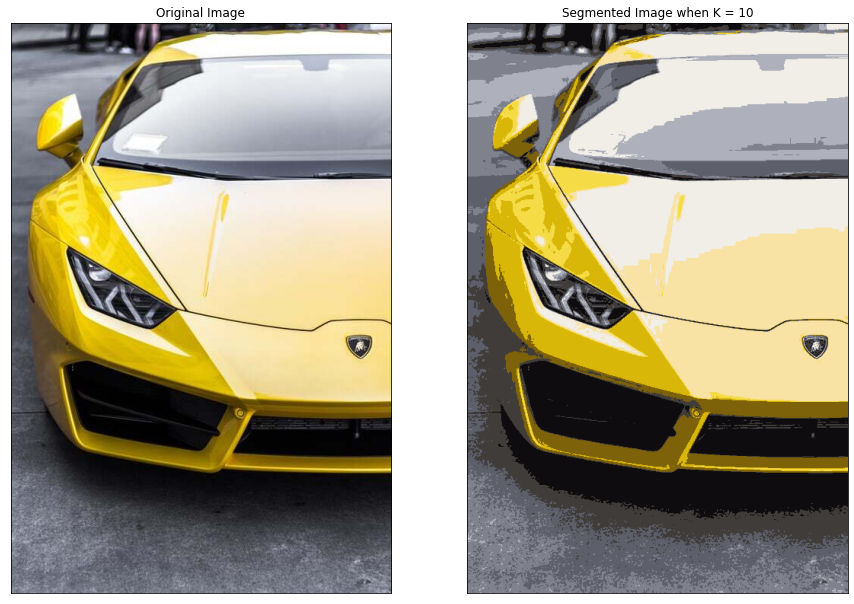

In [16]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()